In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# pd.read_csv('case_study.csv')

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [4]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [5]:
 df[df['_STATE'].isin([9,34,36])]

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


In [6]:
# your code here
df['_STATE'].unique()


array([ 9., 34., 36.])

Now check to see how large our subset df.

In [7]:
# your code here

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [8]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [9]:
#your code here

zero_dict = {88:0, 
            77: np.nan,
            99: np.nan}

df['PHYSHLTH'] = df['PHYSHLTH'].replace(zero_dict)

In [10]:
df.shape

(34545, 358)

In [11]:
df.dropna(subset=['PHYSHLTH'], inplace=True)

In [12]:
df.shape

(33747, 358)

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [13]:
# descriptive statistics
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

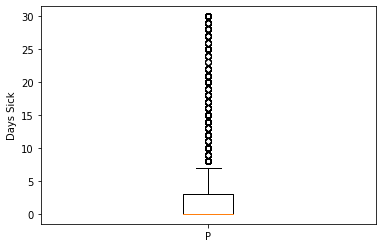

In [14]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot(df['PHYSHLTH'])

# Add x-axis tick labels:
ax.set_xticklabels('PHYSHLTH')

# Add a y-axis label
ax.set_ylabel("Days Sick")

plt.show()


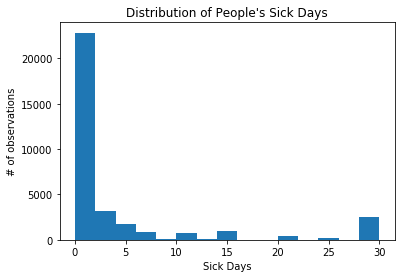

In [15]:
# graphic showing the histogram of data
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df['PHYSHLTH'], bins=15)

ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of People's Sick Days")

plt.show()

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [16]:
# code to calculate the average number of sick days by state

df.groupby('_STATE')['PHYSHLTH'].mean()

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

In [17]:
means = df.groupby('_STATE')['PHYSHLTH'].mean().values
states = ['Conn', 'NJ', 'NY']

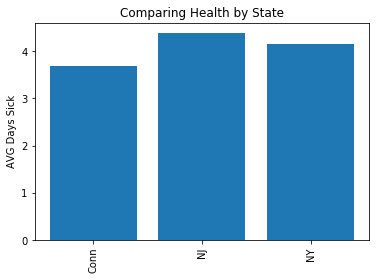

In [18]:
# code to graph those averages using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(states, means)

# Set title and lables
ax.set_xticklabels(['Conn', 'NJ', 'NY'], rotation=90)
ax.set_ylabel("AVG Days Sick")
ax.set_title('Comparing Health by State')

plt.show()

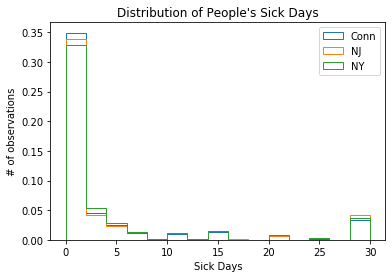

In [19]:
# graphic showing the histogram of data

fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df[df['_STATE']==9]['PHYSHLTH'], bins=15, density=True, histtype='step', label='Conn')
ax.hist(df[df['_STATE']==34]['PHYSHLTH'], bins=15, density=True,histtype='step', label='NJ')
ax.hist(df[df['_STATE']==36]['PHYSHLTH'], bins=15, density=True,histtype='step', label='NY')

# Set labels and title
ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of People's Sick Days")
ax.legend()

plt.show()

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [20]:
def is_Chronic(df):
    if df['PHYSHLTH'] > 10:
        return 1
    else:
        return 0
df['CHRON_SICK'] = df.apply(is_Chronic, axis=1)


In [21]:
# code to create new colum for chronically sick

df['CHRONIC'] = np.where(df['PHYSHLTH']>=20, 1,0)
df
np.where

<function numpy.where>

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [22]:
df.groupby('_STATE')['CHRONIC'].mean()

_STATE
9.0     0.084414
34.0    0.106214
36.0    0.094055
Name: CHRONIC, dtype: float64

In [23]:
# code to calculate averages per state
chronic_means = df.groupby('_STATE')['CHRONIC'].mean().values
df.groupby('_STATE')['CHRONIC'].mean()

_STATE
9.0     0.084414
34.0    0.106214
36.0    0.094055
Name: CHRONIC, dtype: float64

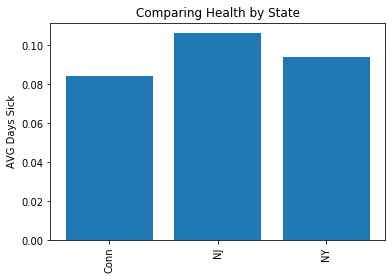

In [24]:
# create graphic to compare chronically sick by state
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(states, chronic_means)

# Set labels and title
ax.set_xticklabels(['Conn', 'NJ', 'NY'], rotation=90)
ax.set_ylabel("AVG Days Sick")
ax.set_title('Comparing Health by State')

plt.show()

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [25]:
df.shape

(33747, 360)

In [26]:
df['SMOKDAY2'].value_counts()

3.0    9494
1.0    2611
2.0    1336
9.0      21
7.0       6
Name: SMOKDAY2, dtype: int64

In [27]:
df['SMOKDAY2'].value_counts().sum()

13468

In [28]:
df['smoking'] = np.where(df['SMOKE100']==2, 3, df['SMOKDAY2'])




In [29]:
df['smoking'].value_counts().sum()

32153

In [30]:
df['smoking'] = np.where(df['SMOKE100']==7, 7, df['smoking'])
df['smoking'] = np.where(df['SMOKE100']==9, 9, df['smoking'])

In [31]:
df['smoking'].count()

32359

In [32]:
df['smoking'].describe()

count    32359.000000
mean         2.830217
std          0.700878
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          9.000000
Name: smoking, dtype: float64

In [33]:
smoking_avg = df['smoking'].value_counts()/df['smoking'].count()
smoking_avg

3.0    0.870824
1.0    0.080689
2.0    0.041287
7.0    0.005161
9.0    0.002040
Name: smoking, dtype: float64

In [34]:
smoking_avg.index

Float64Index([3.0, 1.0, 2.0, 7.0, 9.0], dtype='float64')

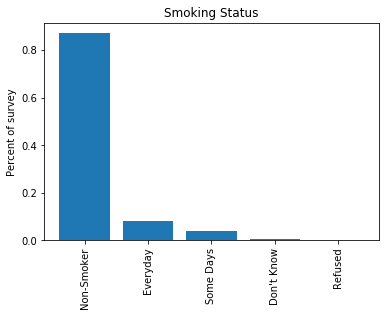

In [52]:
# code to graph those averages using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], smoking_avg)

# Set title and lables
ax.set_xticklabels(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], rotation=90)
ax.set_ylabel("Percent of survey")
ax.set_title('Smoking Status')

plt.show()

In [53]:
df.groupby(['_STATE', 'smoking'])['smoking'].count()

_STATE  smoking
9.0     1.0         706
        2.0         344
        3.0        8870
        7.0          65
        9.0          26
34.0    1.0         901
        2.0         480
        3.0        9595
        7.0          74
        9.0          14
36.0    1.0        1004
        2.0         512
        3.0        9714
        7.0          28
        9.0          26
Name: smoking, dtype: int64

In [54]:
#People smokingvaried by state   agg = aggregate agg({"smoking": "count"})
state_smoking = df.groupby(['_STATE', 'smoking']).agg({'smoking': 'count'})
# Change: groupby state_office and divide by sum
state_pcts = state_smoking.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [55]:
state_pcts

smoking
_STATE smoking           
9.0    1.0       7.052243
       2.0       3.436220
       3.0      88.602537
       7.0       0.649286
       9.0       0.259714
34.0   1.0       8.143529
       2.0       4.338395
       3.0      86.722704
       7.0       0.668836
       9.0       0.126537
36.0   1.0       8.897554
       2.0       4.537398
       3.0      86.086494
       7.0       0.248139
       9.0       0.230415

In [59]:
state_pcts.unstack()

smoking                                         
smoking       1.0       2.0        3.0       7.0       9.0
_STATE                                                    
9.0      7.052243  3.436220  88.602537  0.649286  0.259714
34.0     8.143529  4.338395  86.722704  0.668836  0.126537
36.0     8.897554  4.537398  86.086494  0.248139  0.230415

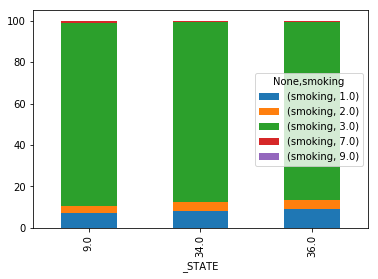

In [56]:
state_pcts.unstack().plot(kind='bar', stacked=True)

In [60]:
#your code here

zero_dict = {3:'non', 
            2: 'some',
            1: 'every',
            7: 'unknown',
            9: 'unknown'}

df['smoking_cat'] = df['smoking'].replace(zero_dict)

In [61]:
df['smoking_cat']

49938         non
49939         non
49940         non
49941         non
49942         non
49943         non
49944         non
49945         non
49946         non
49947         non
49948         non
49949         non
49950         non
49951         non
49952         non
49953         non
49954         non
49955         non
49956         non
49957         non
49958         non
49959       every
49960       every
49961         non
49962         non
49963         non
49964         non
49965         non
49966         non
49967        some
           ...   
303749       some
303750        non
303751        non
303752        non
303753        non
303754        non
303755        non
303756        non
303757        non
303758        non
303759      every
303760       some
303761        non
303762        non
303763        non
303764        non
303765        non
303766        non
303767        non
303768        non
303769        non
303770        non
303771        non
303772        non
303773    

In [62]:
state_smoking_cat = df.groupby(['_STATE', 'smoking_cat']).agg({'smoking': 'count'})
# Change: groupby state_office and divide by sum
state_pcts_cat = state_smoking_cat.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
state_pcts_cat.index.set_levels(['Conn', 'NJ', 'NY'], level=0, inplace=True)
state_pcts_cat

smoking
_STATE smoking_cat           
Conn   every         7.052243
       non          88.602537
       some          3.436220
       unknown       0.909000
NJ     every         8.143529
       non          86.722704
       some          4.338395
       unknown       0.795372
NY     every         8.897554
       non          86.086494
       some          4.537398
       unknown       0.478554

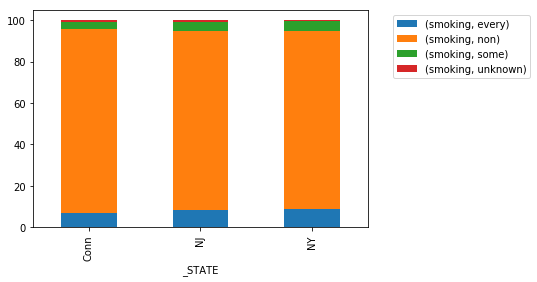

In [63]:
ax = state_pcts_cat.unstack().plot(kind='bar', stacked=True)
ax.legend(bbox_to_anchor=(1.5, 1.0))
plt.show()

In [64]:
cat_avg = df.groupby('smoking_cat')['PHYSHLTH'].mean()
cat_std = df.groupby('smoking_cat')['PHYSHLTH'].std()
cat_avg

smoking_cat
every      6.653007
non        3.764435
some       6.295659
unknown    4.081545
Name: PHYSHLTH, dtype: float64

NameError: name 'cat_avg' is not defined

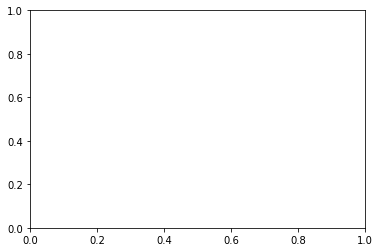

In [38]:
# code to graph those averages using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(['Every', 'Non', 'Some',"unkonw"], cat_avg)

# Set title and lables
ax.set_xticklabels(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], rotation=90)
ax.set_ylabel("Days Sick")
ax.set_title('Days Sick by Smoking Status')

plt.show()

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [42]:
alc_dict = {888:0, 
            777: np.nan,
            999: np.nan
            }

df['alcohol'] = df['ALCDAY5'].replace(alc_dict)



In [43]:
df['alcohol']

49938     101.0
49939     230.0
49940       0.0
49941     103.0
49942     101.0
          ...  
303774    203.0
303775      0.0
303776    204.0
303777      NaN
303778    230.0
Name: alcohol, Length: 33747, dtype: float64

In [47]:
# create a function called times100
def calc_monthly(x):
    if x>200:
        return x-200
    elif x>100:
        return min((x-100)*4.34524, 30)
    else:
        return x

In [48]:
df['alcohol']= df['alcohol'].apply(calc_monthly)

In [49]:
df['alcohol'].describe()

count    31532.000000
mean         5.495244
std          8.423029
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         30.000000
Name: alcohol, dtype: float64

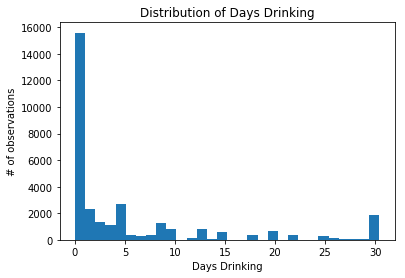

In [75]:
# graphic showing the histogram of data
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df['alcohol'], bins=30)

ax.set_xlabel('Days Drinking')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of Days Drinking")

plt.show()

In [76]:
# code to calculate averages per state
alcohol_state = df.groupby('_STATE')['alcohol'].mean().values
df.groupby('_STATE')['alcohol'].mean()

_STATE
9.0     6.208564
34.0    5.068090
36.0    5.309619
Name: alcohol, dtype: float64

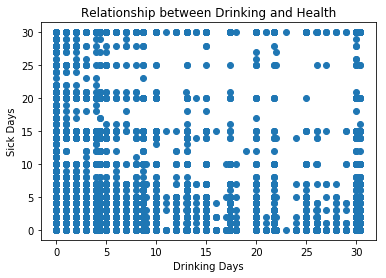

In [77]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(df["alcohol"], df["PHYSHLTH"])

ax.set_xlabel("Drinking Days")
ax.set_ylabel("Sick Days")
ax.set_title('Relationship between Drinking and Health')


plt.show()

In [83]:
df[['PHYSHLTH', 'alcohol']].corr()['PHYSHLTH']

PHYSHLTH    1.000000
alcohol    -0.091016
Name: PHYSHLTH, dtype: float64

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [ ]:
# your code here

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hypotheses below:

1. Smoking increases your chances of feeling sick more days. 

2. Alcohol has no affect on the number of days you feel sick.

3.  People in NJ are less healty than people in Conn.

## Bonus: Create some cool graphics.  

understanding how to relate smok100 to smokday 2

talk more about creating new columns from conditional of anothe column

In [ ]:
learning how to read documentation. 

reading in builtin 

In [ ]:
import sci